In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn=engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Create DataFrames for the provided DataBases
measurement = pd.read_sql("SELECT * FROM Measurement",conn)

# rename to clean the column names
measurement_df = measurement.rename(columns={"id" : "ID", "station" : "Station", "date" : "Date", "prcp" : "Precipitation", "tobs" : "Time of Observation Bias"})

# view new DataFrame
measurement_df.head()

,ID,Station,Date,Precipitation,Time of Observation Bias
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
station = pd.read_sql("SELECT * FROM Station", conn)

station_df = station.rename(columns={"id" : "ID", "station" : "Station", "name" : "Name", "latitude" : "Latitude", "longitude" : "Longitude", "elevation" : "Elevation"})

station_df.head(10)

,ID,Station,Name,Latitude,Longitude,Elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [11]:
# Creating a merged DF from the two above if needed like the last SQL homework

# Merged on Station

measurement_station_df = pd.merge(station_df, measurement_df, on="Station", how="inner")

measurement_station_df.head(10)

,ID_x,Station,Name,Latitude,Longitude,Elevation,ID_y,Date,Precipitation,Time of Observation Bias
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5,2010-01-06,NaN,73.0
5,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,6,2010-01-07,0.06,70.0
6,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,7,2010-01-08,0.00,64.0
7,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,8,2010-01-09,0.00,68.0
8,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,9,2010-01-10,0.00,73.0
9,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,10,2010-01-11,0.01,64.0


In [12]:
# Merged Data and dropping column "ID_x" and "ID_y", if needed

measurement_station_df_clean = measurement_station_df.drop(columns = ["ID_x", "ID_y"])

measurement_station_df_clean.head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-01,0.08,65.0
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-02,0.00,63.0
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-03,0.00,74.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-04,0.00,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-06,NaN,73.0


In [13]:
measurement_station_df_clean.sort_values(by="Date", ascending=False).head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
19549,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2017-08-23,0.45,76.0
12186,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-23,0.08,82.0
2723,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2017-08-23,0.00,81.0
7634,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,2017-08-23,0.00,82.0
12185,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2017-08-22,0.00,82.0


In [14]:
last_12_months = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-23').\
filter(Measurement.date <= '2017-08-23').\
order_by(Measurement.date).all()

last_12_months_df = pd.DataFrame(last_12_months)

In [15]:
prcp_12_data = last_12_months_df.rename(columns={"date" : "Date", "prcp" : "Precipitation"})

prcp_12_data.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [16]:
precipitation_data = pd.DataFrame(data=prcp_12_data).set_index("Date")
precipitation_data.head(10)

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


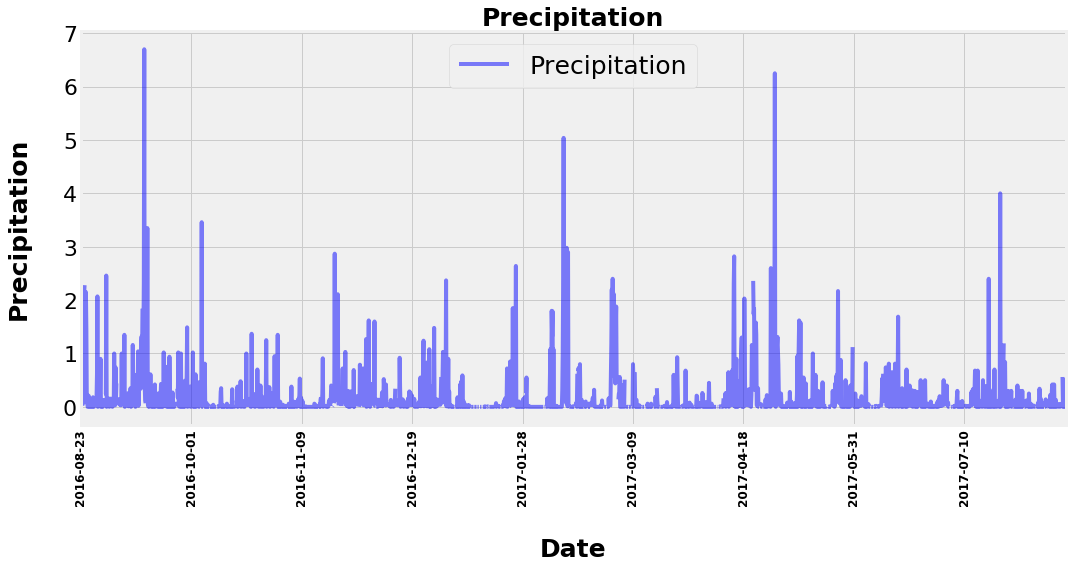

In [17]:
plot_prcp_12 = precipitation_data.plot(figsize = (15, 8), color = 'blue', alpha = 1.5);

plot_prcp_12.set_xlabel("\nDate", weight="bold", size=25);
plot_prcp_12.set_ylabel("Precipitation\n", weight="bold", size=25);
plot_prcp_12.set_title("Precipitation", weight="bold", size=25);

#we must add the legends
plt.xticks(rotation=90, fontsize=12, weight="bold")
plt.yticks(fontsize=22)

plt.legend(loc="upper center", fontsize=25)

# plot.grid()
plt.tight_layout()

plt.savefig("PRCP_OVER_LAST_12_MONTHS.png")

In [18]:
prp_data_stats = precipitation_data.describe()

prp_data_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
count_of_stations = session.query(Measurement.station, Station.name,
                                  func.count(Measurement.station)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station)


In [20]:
active_stations = pd.DataFrame(data= count_of_stations, columns =["Station ID", "Station Name/Location", "Count of Active Stations"])

active_stations_data = active_stations.sort_values(by= "Count of Active Stations", ascending=False)

active_stations_data

,Station ID,Station Name/Location,Count of Active Stations
6,USC00519281,"WAIHEE 837.5, HI US",2772
7,USC00519397,"WAIKIKI 717.2, HI US",2724
1,USC00513117,"KANEOHE 838.1, HI US",2709
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
3,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
4,USC00517948,"PEARL CITY, HI US",1372
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [21]:
lowest_temp = session.query(Measurement.station, Station.name, func.min(Measurement.tobs)).\
filter(Measurement.station==Station.station)


In [22]:
highest_temp = session.query(Measurement.station, Station.name, func.max(Measurement.tobs)).\
filter(Measurement.station==Station.station)

In [23]:
print(f"Lowest Temperature Recorded From Most Active Station- {lowest_temp[0][1]}")
print(f"Station ID - {lowest_temp[0][0]}")
print(f"\nHighest Temperature Recorded From Most Active Station- {highest_temp[0][1]}") 
print(f"Station ID - {highest_temp[0][0]}")

Lowest Temperature Recorded From Most Active Station- HONOLULU OBSERVATORY 702.2, HI US
Station ID - USC00511918

Highest Temperature Recorded From Most Active Station- WAIKIKI 717.2, HI US
Station ID - USC00519397


In [24]:
temp_max_active_station = session.query(Measurement.station, Station.name, func.avg(Measurement.tobs)).\
filter(Measurement.station==Station.station).\
group_by(Measurement.station).\
filter(Measurement.station == 'USC00519281')

In [25]:
avg_temp_highest_station = round(temp_max_active_station[0][2])
print(f"\nAverage Temperature Recorded From The Most Active Station: {avg_temp_highest_station} Degrees in Farenheit")


Average Temperature Recorded From The Most Active Station: 72 Degrees in Farenheit


In [26]:
measurement_station_df_clean.head()

,Station,Name,Latitude,Longitude,Elevation,Date,Precipitation,Time of Observation Bias
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-01,0.08,65.0
1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-02,0.00,63.0
2,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-03,0.00,74.0
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-04,0.00,76.0
4,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2010-01-06,NaN,73.0


In [27]:
over_12_months = session.query(Measurement.station, Station.name, Measurement.date, Measurement.tobs).\
filter(Measurement.station == Station.station).\
filter(Measurement.station == "USC00519281").\
filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").\
order_by(Measurement.date).all()

In [28]:
highest_over_12_months = pd.DataFrame(over_12_months)

highest_over_12_months_df = highest_over_12_months.rename(columns={"station" : "Station", "name" : "Name", "date" : "Date", "tobs" : "Time of Observation Bias"})

highest_over_12_months_df.head(10)

,Station,Name,Date,Time of Observation Bias
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0
5,USC00519281,"WAIHEE 837.5, HI US",2016-08-28,73.0
6,USC00519281,"WAIHEE 837.5, HI US",2016-08-29,78.0
7,USC00519281,"WAIHEE 837.5, HI US",2016-08-30,77.0
8,USC00519281,"WAIHEE 837.5, HI US",2016-08-31,78.0
9,USC00519281,"WAIHEE 837.5, HI US",2016-09-01,80.0


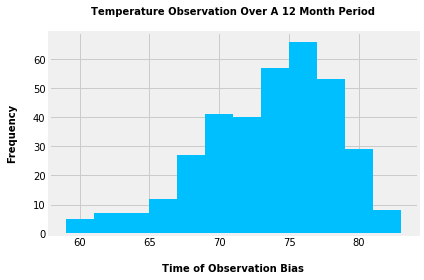

In [29]:
plt.hist(highest_over_12_months_df["Time of Observation Bias"],bins=12, color="deepskyblue", alpha=1.0);

plt.title("Temperature Observation Over A 12 Month Period\n", weight="bold", size=10);
plt.xlabel("\nTime of Observation Bias", weight="bold", size=10);
plt.ylabel("Frequency\n", weight="bold", size=10)

plt.tight_layout()

In [30]:
Temp=[]
start_date='2016-08-01'
end_date='2017-08-01'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
    #print(str(TMAX))
    #print(str(TMIN))
    #print(str(TAVG))
calc_temps(start_date, end_date)
Temp

[87.0, 58.0, 74.64288840262581]

In [31]:
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

C:\Users\Hector\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


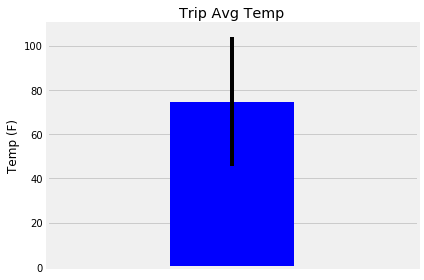

In [32]:
fig = plt.figure()
plt.bar( 1,TAVG, color = 'blue', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()

In [33]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
Rainfall_results = session.query(Measurement.station, func.count(Measurement.prcp)).\
                   group_by(Measurement.station).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
Rainfall_results

[('USC00513117', 365),
 ('USC00514830', 261),
 ('USC00516128', 331),
 ('USC00517948', 67),
 ('USC00519281', 365),
 ('USC00519397', 361),
 ('USC00519523', 320)]

In [36]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:

from sqlalchemy import extract  
trip_month=8
trip_days=range(1, 16)
for i in range(1, 16):
    subquery=session.query(Measurement.date).filter(extract('month', Measurement.date)==trip_month).\
             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date).all()
subquery

[('2010-08-15'),
 ('2011-08-15'),
 ('2012-08-15'),
 ('2013-08-15'),
 ('2014-08-15'),
 ('2015-08-15'),
 ('2016-08-15'),
 ('2017-08-15')]

In [38]:
dates=[]
daily_normals_Three_AVG=[]
daily_normals_TMAX=[]
daily_normals_TMIN=[]
daily_normals_TAVG=[]

trip_month=8
trip_days=range(1, 16)

def daily_normals():
    
    for i in range(1,16):
        results=session.query(Measurement.date.label("dates"), func.max(Measurement.tobs).label("max_tobs"),\
                             func.min(Measurement.tobs).label("min_tobs"),func.avg(Measurement.tobs).label("avg_tobs")).\
                             filter(extract('month', Measurement.date)==trip_month).\
                             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date)
        results
        for res in results.all():
             print( res)
        
        res
        TMAX = res.max_tobs
        TMIN= res.min_tobs
        TAVG= res.avg_tobs
        Date= res.dates
        
        data = [TMAX, TMIN, TAVG]
        #avg = [float(sum(col))/len(col) for col in zip(*data)]

        dates.append(Date)
        #daily_normals_Three_AVG.append(avg)
        daily_normals_TMAX.append(TMAX)
        daily_normals_TMIN.append(TMIN)
        daily_normals_TAVG.append(TAVG)
        
daily_normals()

('2010-08-01', 77.0, 71.0, 73.42857142857143)
('2011-08-01', 78.0, 67.0, 73.375)
('2012-08-01', 79.0, 71.0, 75.85714285714286)
('2013-08-01', 79.0, 75.0, 76.83333333333333)
('2014-08-01', 83.0, 73.0, 77.42857142857143)
('2015-08-01', 79.0, 73.0, 77.4)
('2016-08-01', 78.0, 73.0, 76.16666666666667)
('2017-08-01', 77.0, 72.0, 74.5)
('2010-08-02', 76.0, 70.0, 73.22222222222223)
('2011-08-02', 77.0, 70.0, 73.625)
('2012-08-02', 78.0, 68.0, 73.5)
('2013-08-02', 78.0, 70.0, 74.57142857142857)
('2014-08-02', 81.0, 73.0, 77.71428571428571)
('2015-08-02', 84.0, 76.0, 80.0)
('2016-08-02', 80.0, 72.0, 76.57142857142857)
('2017-08-02', 83.0, 73.0, 79.0)
('2010-08-03', 77.0, 70.0, 73.11111111111111)
('2011-08-03', 78.0, 71.0, 75.25)
('2012-08-03', 78.0, 72.0, 74.57142857142857)
('2013-08-03', 79.0, 72.0, 76.66666666666667)
('2014-08-03', 83.0, 74.0, 78.33333333333333)
('2015-08-03', 85.0, 75.0, 80.0)
('2016-08-03', 82.0, 74.0, 78.42857142857143)
('2017-08-03', 81.0, 76.0, 79.0)
('2010-08-04', 77.0, 

In [39]:
Daily_normals_df= pd.DataFrame({'Date': dates, 'TMAX': daily_normals_TMAX, 'TMIN': daily_normals_TMIN,'TAVG': daily_normals_TAVG,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,TMAX,TMIN,TAVG
Date,,,
2017-08-01,77.0,72.0,74.5
2017-08-02,83.0,73.0,79.0
2017-08-03,81.0,76.0,79.0
2017-08-04,82.0,77.0,80.0
2017-08-05,82.0,77.0,80.0


<function matplotlib.pyplot.savefig>

<Figure size 648x792 with 0 Axes>

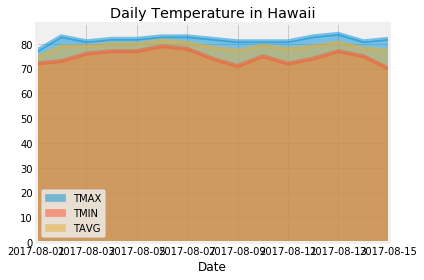

In [40]:
fig = plt.figure(figsize=(9, 11))
ax = Daily_normals_df.plot(kind='area', stacked=False, title='Daily Temperature in Hawaii')
ax.set_xlabel('Date')
plt.tight_layout()
plt.savefig